In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import tensorflow as tf
import math
from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
import os 
import glob
import shutil
import seaborn as sns
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model

2023-05-19 17:53:30.744756: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 17:53:30.858166: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-19 17:53:31.420983: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-19 17:53:31.421083: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [2]:
# model1_d1 = load_model('../xray/TRAINED_MODELS/d1/model_1_97_94.h5')
# model2_d1 = load_model('../xray/TRAINED_MODELS/d1/xception_model_3_(1)_xx_xx.h5')

model1 = load_model('../xray/TRAINED_MODELS/1_MOBILENET.h5')
#model2 = load_model('../xray/TRAINED_MODELS/2_RESNET.h5')
model2 = load_model('../xray/TRAINED_MODELS/d2/MODEL_d2-XCEPTION(1).h5')
model3 = load_model('../xray/TRAINED_MODELS/3_XCEPTION.h5')

2023-05-19 17:53:32.606840: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-19 17:53:32.609986: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-19 17:53:32.622133: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-19 17:53:32.625144: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-19 17:53:32.628962: I tensorflow/compiler/xla/stream_executo

In [4]:
# Load datasets
dataset1_images = "../xray/CLAHE_dataset_1/DATASET"
train_dataset_1 = tf.keras.preprocessing.image_dataset_from_directory(dataset1_images, validation_split=0.1, subset="training", seed=42, batch_size=32, smart_resize=True, image_size=(256, 256))
test_dataset_1 = tf.keras.preprocessing.image_dataset_from_directory(dataset1_images, validation_split=0.1, subset="validation", seed=42, batch_size=32, smart_resize=True, image_size=(256, 256))

dataset2_images = "../xray/CLAHE_dataset_2_altern/DATASET"
train_dataset_2 = tf.keras.preprocessing.image_dataset_from_directory(dataset2_images, validation_split=0.1, subset="training", seed=42, batch_size=32, smart_resize=True, image_size=(256, 256))
test_dataset_2 = tf.keras.preprocessing.image_dataset_from_directory(dataset2_images, validation_split=0.1, subset="validation", seed=42, batch_size=32, smart_resize=True, image_size=(256, 256))

dataset3_images = "../xray/CLAHE_dataset_3_altern/DATASET"
train_dataset_3 = tf.keras.preprocessing.image_dataset_from_directory(dataset3_images, validation_split=0.1, subset="training", seed=42, batch_size=32, smart_resize=True, image_size=(256, 256))
test_dataset_3 = tf.keras.preprocessing.image_dataset_from_directory(dataset3_images, validation_split=0.1, subset="validation", seed=42, batch_size=32, smart_resize=True, image_size=(256, 256))

AUTOTUNE = tf.data.AUTOTUNE

combined_train_dataset = train_dataset_1.concatenate(train_dataset_2).concatenate(train_dataset_3)
combined_test_dataset = test_dataset_1.concatenate(test_dataset_2).concatenate(test_dataset_3)
train_dataset_all = combined_train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset_all = combined_test_dataset.prefetch(buffer_size=AUTOTUNE)

Found 23472 files belonging to 5 classes.
Using 21125 files for training.
Found 23472 files belonging to 5 classes.
Using 2347 files for validation.
Found 21239 files belonging to 5 classes.
Using 19116 files for training.
Found 21239 files belonging to 5 classes.
Using 2123 files for validation.
Found 21852 files belonging to 5 classes.
Using 19667 files for training.
Found 21852 files belonging to 5 classes.
Using 2185 files for validation.


In [4]:
combined_dataset = test_dataset_1.concatenate(test_dataset_2).concatenate(test_dataset_3)

In [5]:
#classes = combined_dataset.class_names
#numClasses = len(combined_dataset.class_names)
#print(classes)
#AUTOTUNE = tf.data.AUTOTUNE

test_dataset_all = combined_dataset.prefetch(buffer_size=AUTOTUNE)

In [5]:
classes = ['Bacterial Pneumonia', 'COVID', 'Normal', 'Tuberculosis', 'Viral Pneumonia']

In [12]:
from tensorflow.keras.layers import Input, Average
model1 = Model(inputs=model1.inputs, outputs=model1.outputs,name='name_of_model1')
model2 = Model(inputs=model2.inputs, outputs=model2.outputs,name='name_of_model2')
model3 = Model(inputs=model3.inputs, outputs=model3.outputs,name='name_of_model3')
models = [model1,model2,model3]

model_input=Input(shape=(256,256,3))
model_outputs=[model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [13]:
ensemble_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [14]:
history=ensemble_model.fit(
train_dataset_all,
validation_data=test_dataset_all,
epochs=5)

Epoch 1/5
1874/1874 [==============================] - 392s 195ms/step - loss: 0.1315 - accuracy: 0.9650 - val_loss: 0.1289 - val_accuracy: 0.9633
Epoch 2/5
1874/1874 [==============================] - 365s 195ms/step - loss: 0.1025 - accuracy: 0.9767 - val_loss: 0.1116 - val_accuracy: 0.9737
Epoch 3/5
1874/1874 [==============================] - 365s 195ms/step - loss: 0.0915 - accuracy: 0.9806 - val_loss: 0.1019 - val_accuracy: 0.9707
Epoch 4/5
1874/1874 [==============================] - 365s 195ms/step - loss: 0.0827 - accuracy: 0.9827 - val_loss: 0.0976 - val_accuracy: 0.9739
Epoch 5/5
1874/1874 [==============================] - 365s 195ms/step - loss: 0.0745 - accuracy: 0.9843 - val_loss: 0.1018 - val_accuracy: 0.9727


In [19]:
#from tensorflow.keras import Model
ensemble_model.save('average_ensembled_model_98_97.h5')

ValueError: Unable to create dataset (name already exists)

In [21]:
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Загрузите и создайте экземпляры моделей model1, model2, model3

targets_ens = []
predictions_ens = []

for images, labels in tqdm(test_dataset_all, desc="Predicting"):
    targets_ens.extend(labels.numpy())  # Добавьте фактические метки классов в список targets
    preds = ensemble_model(images)
    #print(preds)
    pred_classes = np.argmax(preds, axis=1)  # Преобразуйте предсказания в метки классов
    predictions_ens.extend(pred_classes)
# Вычислите метрики оценки модели, используя targets и predictions

# Пример вычисления точности
accuracy = np.mean(np.array(targets_ens) == np.array(predictions_ens))
y_true = targets_ens  # Истинные метки классов
y_pred = predictions_ens # Предсказанные метки классов

# Расчет Accuracy (Точность)
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Расчет Precision (Точность)
precision = precision_score(y_true, y_pred, average='macro')
print("Precision:", precision)

# Расчет Recall (Полнота)
recall = recall_score(y_true, y_pred, average='macro')
print("Recall:", recall)

# Расчет F1-score (F1-мера)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1-score:", f1)

# Расчет матрицы ошибок (Confusion Matrix)
confusion_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Predicting: 100%|██████████| 210/210 [00:53<00:00,  3.90it/s]

Accuracy: 0.9726521412471826
Precision: 0.9656057976906244
Recall: 0.9593202205157578
F1-score: 0.9619772509540884
Confusion Matrix:
[[1127    0    0    2   34]
 [   0 1667    7    4    1]
 [   0   19 2641    1    0]
 [   0   10    1  298    0]
 [ 103    0    0    0  740]]


In [23]:
from sklearn.metrics import f1_score
f1_score(targets_ens, predictions_ens, average='macro'), f1_score(targets_ens, predictions_ens, average='micro')

(0.9619772509540884, 0.9726521412471826)

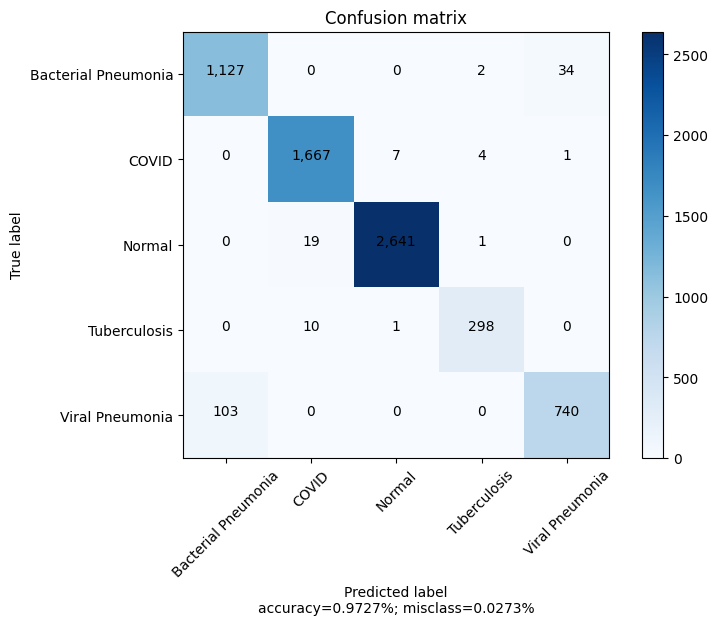

In [22]:
def plot_confusion_matrix(cm, target_names, cmap=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}%; misclass={:0.4f}%'.format(accuracy, misclass))
    plt.show()
plot_confusion_matrix(confusion_mat, classes)

In [10]:
import numpy as np
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Загрузите и создайте экземпляры моделей model1, model2, model3

def predict(x):
    pred1 = model1(x)
    pred2 = model2(x)
    pred3 = model3(x)
    pred_union = (pred1 + pred2 + pred3) / 3
    #pred_union = np.mean(pred1, pred2, pred3)
    return pred_union

targets = []
predictions = []

for images, labels in tqdm(test_dataset_all, desc="Predicting"):
    targets.extend(labels.numpy())  # Добавьте фактические метки классов в список targets
    preds = predict(images)
    #print(preds)
    pred_classes = np.argmax(preds, axis=1)  # Преобразуйте предсказания в метки классов
    predictions.extend(pred_classes)
# Вычислите метрики оценки модели, используя targets и predictions

# Пример вычисления точности
accuracy = np.mean(np.array(targets) == np.array(predictions))
y_true = targets  # Истинные метки классов
y_pred = predictions # Предсказанные метки классов

# Расчет Accuracy (Точность)
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Расчет Precision (Точность)
precision = precision_score(y_true, y_pred, average='macro')
print("Precision:", precision)

# Расчет Recall (Полнота)
recall = recall_score(y_true, y_pred, average='macro')
print("Recall:", recall)

# Расчет F1-score (F1-мера)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1-score:", f1)

# Расчет матрицы ошибок (Confusion Matrix)
confusion_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Predicting: 100%|██████████| 210/210 [00:52<00:00,  3.98it/s]

Accuracy: 0.9406461307287753
Precision: 0.9244705503026418
Recall: 0.8950232492580563
F1-score: 0.9080354489332692


TypeError: list indices must be integers or slices, not tuple

In [ ]:
# Построение ROC-кривой
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Случайная модель (baseline)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
len(targets)

6655

In [16]:
len(predictions)

6655

In [17]:
from sklearn.metrics import f1_score
f1_score(targets, predictions, average='macro'), f1_score(targets, predictions, average='micro')

(0.9080354489332692, 0.9406461307287753)

In [18]:
import numpy as np
from tqdm import tqdm
# Загрузите и создайте экземпляры моделей model1, model2, model3

targets1 = []
predictions1 = []

for images, labels in tqdm(test_dataset_all, desc="Predicting"):
    targets1.extend(labels.numpy())  # Добавьте фактические метки классов в список targets
    preds = model1(images)
    #print(preds)
    pred_classes = np.argmax(preds, axis=1)  # Преобразуйте предсказания в метки классов
    predictions1.extend(pred_classes)
# Вычислите метрики оценки модели, используя targets и predictions

# Пример вычисления точности
accuracy = np.mean(np.array(targets1) == np.array(predictions1))
y_true = targets1  # Истинные метки классов
y_pred = predictions1 # Предсказанные метки классов

# Расчет Accuracy (Точность)
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Расчет Precision (Точность)
precision = precision_score(y_true, y_pred, average='macro')
print("Precision:", precision)

# Расчет Recall (Полнота)
recall = recall_score(y_true, y_pred, average='macro')
print("Recall:", recall)

# Расчет F1-score (F1-мера)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1-score:", f1)

# Расчет матрицы ошибок (Confusion Matrix)
confusion_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Predicting: 100%|██████████| 210/210 [00:22<00:00,  9.38it/s]

Accuracy: 0.9030803906836965
Precision: 0.89083281068574
Recall: 0.7786529943191984
F1-score: 0.7985103726246593
Confusion Matrix:
[[ 975    9    7    0  172]
 [   4 1647   22    3    3]
 [   8   14 2620    2   17]
 [   2  101  119   87    0]
 [ 150    0   12    0  681]]


In [19]:
import numpy as np
from tqdm import tqdm
# Загрузите и создайте экземпляры моделей model1, model2, model3

targets2 = []
predictions2 = []

for images, labels in tqdm(test_dataset_all, desc="Predicting"):
    targets2.extend(labels.numpy())  # Добавьте фактические метки классов в список targets
    preds = model2(images)
    #print(preds)
    pred_classes = np.argmax(preds, axis=1)  # Преобразуйте предсказания в метки классов
    predictions2.extend(pred_classes)
# Вычислите метрики оценки модели, используя targets и predictions

# Пример вычисления точности
accuracy = np.mean(np.array(targets2) == np.array(predictions2))
y_true = targets2  # Истинные метки классов
y_pred = predictions2 # Предсказанные метки классов

# Расчет Accuracy (Точность)
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Расчет Precision (Точность)
precision = precision_score(y_true, y_pred, average='macro')
print("Precision:", precision)

# Расчет Recall (Полнота)
recall = recall_score(y_true, y_pred, average='macro')
print("Recall:", recall)

# Расчет F1-score (F1-мера)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1-score:", f1)

# Расчет матрицы ошибок (Confusion Matrix)
confusion_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Predicting: 100%|██████████| 210/210 [00:20<00:00, 10.48it/s]

Accuracy: 0.9337340345604809
Precision: 0.9109560130022045
Recall: 0.8959646871464912
F1-score: 0.9030625961427436
Confusion Matrix:
[[1022    2    6    2  131]
 [   1 1613   38   27    0]
 [   1   36 2613    5    6]
 [   0   26   33  250    0]
 [  95    0   32    0  716]]


In [20]:
import numpy as np
from tqdm import tqdm
# Загрузите и создайте экземпляры моделей model1, model2, model3

targets3 = []
predictions3 = []

for images, labels in tqdm(test_dataset_all, desc="Predicting"):
    targets3.extend(labels.numpy())  # Добавьте фактические метки классов в список targets
    preds = model3(images)
    #print(preds)
    pred_classes = np.argmax(preds, axis=1)  # Преобразуйте предсказания в метки классов
    predictions3.extend(pred_classes)
# Вычислите метрики оценки модели, используя targets и predictions

# Пример вычисления точности
accuracy = np.mean(np.array(targets3) == np.array(predictions3))
y_true = targets3  # Истинные метки классов
y_pred = predictions3 # Предсказанные метки классов

# Расчет Accuracy (Точность)
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Расчет Precision (Точность)
precision = precision_score(y_true, y_pred, average='macro')
print("Precision:", precision)

# Расчет Recall (Полнота)
recall = recall_score(y_true, y_pred, average='macro')
print("Recall:", recall)

# Расчет F1-score (F1-мера)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1-score:", f1)

# Расчет матрицы ошибок (Confusion Matrix)
confusion_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Predicting: 100%|██████████| 210/210 [00:20<00:00, 10.41it/s]

Accuracy: 0.8934635612321563
Precision: 0.8556403704416382
Recall: 0.8492165261698688
F1-score: 0.8520493723437632
Confusion Matrix:
[[ 955   10   18    0  180]
 [   0 1585   41   50    3]
 [   3  120 2511   19    8]
 [   0   28   47  232    2]
 [ 115    3   61    1  663]]


In [23]:
from sklearn.metrics import f1_score
f1_score(targets1, predictions1, average='macro'), f1_score(targets1, predictions1, average='micro')

(0.7985103726246593, 0.9030803906836965)

In [10]:
import numpy as np
from tqdm import tqdm
# Загрузите и создайте экземпляры моделей model1, model2, model3

targets2 = []
predictions2 = []

for images, labels in tqdm(test_dataset_all, desc="Predicting"):
    targets2.extend(labels.numpy())  # Добавьте фактические метки классов в список targets
    preds = model2(images)
    #print(preds)
    pred_classes = np.argmax(preds, axis=1)  # Преобразуйте предсказания в метки классов
    predictions2.extend(pred_classes)
# Вычислите метрики оценки модели, используя targets и predictions

# Пример вычисления точности
accuracy = np.mean(np.array(targets2) == np.array(predictions2))
print("Accuracy:", accuracy)

Predicting: 100%|██████████| 210/210 [00:19<00:00, 10.57it/s]

Accuracy: 0.9337340345604809


In [22]:
from sklearn.metrics import f1_score
f1_score(targets2, predictions2, average='macro'), f1_score(targets2, predictions2, average='micro')

(0.9030625961427436, 0.9337340345604809)

In [44]:
import numpy as np
from tqdm import tqdm
# Загрузите и создайте экземпляры моделей model1, model2, model3

targets3 = []
predictions3 = []

for images, labels in tqdm(test_dataset_all, desc="Predicting"):
    targets3.extend(labels.numpy())  # Добавьте фактические метки классов в список targets
    preds = model3(images)
    #print(preds)
    pred_classes = np.argmax(preds, axis=1)  # Преобразуйте предсказания в метки классов
    predictions3.extend(pred_classes)
# Вычислите метрики оценки модели, используя targets и predictions

# Пример вычисления точности
accuracy = np.mean(np.array(targets3) == np.array(predictions3))
print("Accuracy:", accuracy)

Predicting: 100%|██████████| 210/210 [00:19<00:00, 10.66it/s]

Accuracy: 0.8934635612321563


In [21]:
from sklearn.metrics import f1_score
f1_score(targets3, predictions3, average='macro'), f1_score(targets3, predictions3, average='micro')

(0.8520493723437632, 0.8934635612321563)

In [53]:
len(predictions)

6655

In [ ]:
import seaborn as sns
cm = confusion_matrix(test_dataset, predictions)
cm_plot = sns.heatmap(cm, annot=True, cmap='Blues');

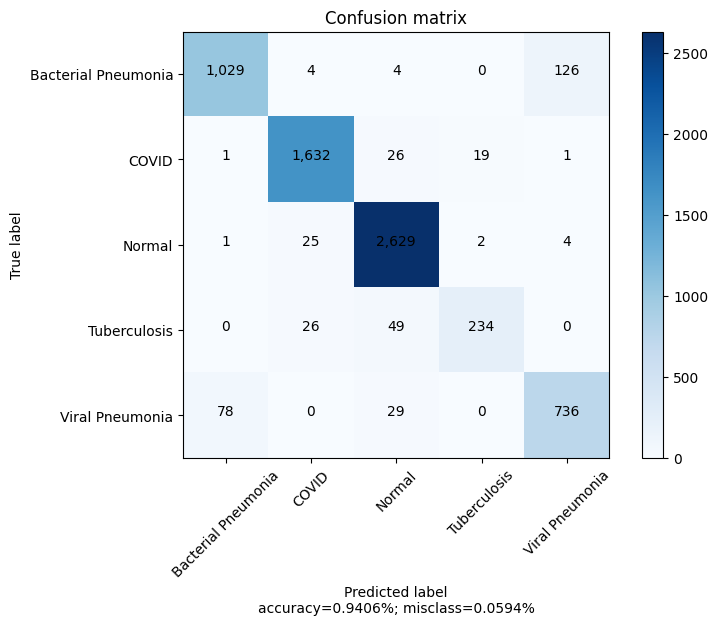

In [25]:
def plot_confusion_matrix(cm, target_names, cmap=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}%; misclass={:0.4f}%'.format(accuracy, misclass))
    plt.show()
plot_confusion_matrix(confusion_mat, classes)